In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/BA820 - Project/merged_data_small.parquet')
print(df.head())

                 user_id                 name_x           time  rating  \
0  116404531305033742641  Zygintas Krasodomskis  1568240961087     5.0   
1  101806853201406057266            Olga Harbar  1590701094969     3.0   
2  110623621391484838669             Amit Patel  1558575636156     4.0   
3  114893265310260912873         Jerry Cardillo  1535435901765     4.0   
4  106080008682473967828           Jake Moreira  1487952273508     4.0   

                                                text  resp  \
0                     Honestly, best burgers in town  None   
1                                               None  None   
2                                               None  None   
3                                               None  None   
4  This place gave me a good sanwich and a fry bu...  None   

                                 gmap_id                 name_y  \
0  0x89e37a19e56a4565:0xbb2aefc495e8c505              Five Guys   
1  0x89e45acc1861f709:0x9ccc502a907ff195  Price 

In [3]:
df.isnull().sum()

,0
user_id,0
name_x,0
time,0
rating,0
text,391626
resp,756452
gmap_id,0
name_y,0
address,0
latitude,0


In [4]:
df

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url
0,116404531305033742641,Zygintas Krasodomskis,1568240961087,5.0,"Honestly, best burgers in town",None,0x89e37a19e56a4565:0xbb2aefc495e8c505,Five Guys,"Five Guys, 263 Huntington Ave, Boston, MA 02115",42.342201,-71.086128,"['Hamburger restaurant', 'American restaurant'...",4.3,842.0,"[['Saturday', '11AM–10PM'], ['Sunday', '11AM–9...","{'Service options': ['No-contact delivery', 'D...","['0x89e37a0ef037cc93:0xdb4e885f04209890', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,101806853201406057266,Olga Harbar,1590701094969,3.0,None,None,0x89e45acc1861f709:0x9ccc502a907ff195,Price Rite of Seekonk,"Price Rite of Seekonk, 140 Taunton Ave, Seekon...",41.826199,-71.341056,"['Grocery store', 'Bakery', 'Grocery delivery ...",4.3,895.0,"[['Tuesday', '8AM–9PM'], ['Wednesday', '8AM–9P...","{'Service options': ['In-store shopping', 'Del...","['0x89e45ae7e141c4b5:0xe96d1f60cac5ecc', '0x89...",https://www.google.com/maps/place//data=!4m2!3...
2,110623621391484838669,Amit Patel,1558575636156,4.0,None,None,0x89e379cf7e6b504d:0xe1c48bca99fcba2b,Coreanos Allston,"Coreanos Allston, 172 Brighton Ave, Boston, MA...",42.352960,-71.133063,['Korean restaurant'],4.6,446.0,"[['Sunday', '11:30AM–10PM'], ['Monday', '11:30...","{'Service options': ['Delivery', 'Dine-in', 'T...","['0x89e379702a98de8b:0x2fce7ce86a38c6cc', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,114893265310260912873,Jerry Cardillo,1535435901765,4.0,None,None,0x89fca77e3b810389:0x6a6bdb1acb82a3cf,Pied Bar,"Pied Bar, 193A Commercial St, Provincetown, MA...",42.048708,-70.188871,"['Bar & grill', 'Night club', 'Restaurant']",3.9,38.0,"[['Friday', '12PM–1AM'], ['Saturday', '12PM–1A...","{'Service options': ['Delivery'], 'Offerings':...","['0x89fca77e2f735d79:0x8bfdd6c19fe7d5fc', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,106080008682473967828,Jake Moreira,1487952273508,4.0,This place gave me a good sanwich and a fry bu...,None,0x89e45a7ca871adf7:0xb33fc9eb27b49d00,Chick-fil-A,"Chick-fil-A, 1100 Fall River Ave, Seekonk, MA ...",41.795562,-71.328996,"['Fast food restaurant', 'Breakfast restaurant...",4.5,2543.0,"[['Friday', '8AM–10PM'], ['Saturday', '8AM–10P...","{'Service options': ['Outdoor seating', 'Curbs...","['0x89e45a63536c92af:0x6ff8455e2a5e86d3', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861487,103717471965569016148,Jay w,1597663283675,5.0,None,None,0x89e306dbe1c86e47:0x3c4b297f6a508334,Choice Fitness,"Choice Fitness, 126 Merrimack St #2, Methuen, ...",42.731285,-71.138992,"['Fitness center', 'Gym']",4.0,136.0,"[['Monday', '4:30AM–11PM'], ['Tuesday', '4:30A...",{'Accessibility': ['Wheelchair accessible entr...,"['0x89e3a82445e9a675:0x8392039a31f6eb4a', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
861488,100215592794965519697,Jackie Duszlak,1506998464433,2.0,None,None,0x89e4035510bb5ef5:0x370d58dd6e5ee4da,Auburn Plaza Shopping Center,"Auburn Plaza Shopping Center, 703 Southbridge ...",42.183228,-71.859687,['Shopping mall'],4.1,678.0,"[['Sunday', '11AM–6PM'], ['Monday', '10AM–9PM'...","{'Service options': ['In-store shopping'], 'Ac...","['0x89e404bb2fc50023:0x570bc55cadd36cad', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
861489,102101106596071149443,Jim Moorcroft,1546216910250,1.0,Too expensive. I left and went to cumby Farms,None,0x89e3f31a0e486f31:0x9f5092285f0c4b2d,Dunkin',"Dunkin', 267 Central St, Berlin, MA 01503",42.397032,-71.603283,"['Coffee shop', 'Bagel shop', 'Bakery', 'Break...",3.7,85.0,"[['Thursday', '5AM–8PM'], ['Friday', '5AM–8PM'...","{'Service options': ['Delivery', 'Takeout', 'D...","['0x89e3f322b5c4a8e7:0x74afc33510c25c02', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
861490,103820169425374095371,EMANUEL MERLE,1600098837933,5.0,Just wanna share

In [5]:
df_clean_text = df[df['text'].notnull()]
df_clean_resp = df[df['resp'].notnull()]

For better sampling purpose, I decided to use stratified sampling by rating.

In [6]:
print(df_clean_text['rating'].value_counts())

rating
5.0    306373
4.0     75194
1.0     41405
3.0     30495
2.0     16399
Name: count, dtype: int64


In [7]:
df_sampled_clean_text = df_clean_text.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=7))

<ipython-input-7-1145c4cc37f9>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled_clean_text = df_clean_text.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=7))


In [8]:
print(df_sampled_clean_text['rating'].value_counts())

rating
5.0    91912
4.0    22558
1.0    12422
3.0     9148
2.0     4920
Name: count, dtype: int64


In [9]:
df_sampled_clean_text.sort_values(by='rating', axis=0,ascending=False)

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url
181363,101597992580459280327,Derek Pinto,1611003951259,5.0,Very friendly and professional. Saved us money...,"{'time': 1611239331586, 'text': 'Hello Derek P...",0x89e4ba50f86f8905:0x2198cbc1cd3c42c8,AT&T Store,"AT&T Store, 33 Home Depot Dr, Plymouth, MA 02360",41.934009,-70.660120,"['Cell phone store', 'Cell phone accessory sto...",4.8,356.0,"[['Tuesday', '10AM–7PM'], ['Wednesday', '10AM–...","{'Service options': ['Curbside pickup', 'In-st...","['0x89e4bb1a9e0bab37:0xcb967c32c045ca23', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
478124,114484423892076280016,Louis Malaquias,1564664362211,5.0,Experienced professional with decades of exper...,"{'time': 1565123079889, 'text': 'Louis thank y...",0x89e318c41ab11837:0xf7d80ad2c81d6bdb,Jim's Auto Installations and Detailing Center,"Jim's Auto Installations and Detailing Center,...",42.680553,-70.842801,"['Car detailing service', 'Car stereo store', ...",4.9,53.0,"[['Thursday', '8AM–5PM'], ['Friday', '8AM–5PM'...",{'Accessibility': ['Wheelchair accessible entr...,"['0x89e318c6afdd6bd5:0x1f1d68809a3cf1e8', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
44790,105886780019656785242,Raquel de souza,1367889208613,5.0,I had an excellent experience purchasing a Jet...,None,0x89e376ce5b209c83:0x60006be8f09d1ba8,Colonial Volkswagen of Medford,"Colonial Volkswagen of Medford, 340 Mystic Ave...",42.403308,-71.098478,['Volkswagen dealer'],4.7,1253.0,"[['Friday', '9AM–6PM'], ['Saturday', '9AM–5PM'...","{'Service options': ['In-store shopping', 'Del...","['0x89e37805438f7351:0x67533489689a3009', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
635486,114710627871313799442,Greg Flick,1579701382222,5.0,Bring offerrings,None,0x89e313804f34d4d9:0xe08cac8b55cde173,Proctor's Ledge,"Proctor's Ledge, 7 Pope St, Salem, MA 01970",42.517613,-70.909088,"['Memorial', 'Tourist attraction']",4.5,277.0,"[['Thursday', '8AM–8PM'], ['Friday', '8AM–8PM'...",{'Accessibility': ['Wheelchair accessible entr...,"['0x89e31465ac475ea3:0x11845782ae1b2e12', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
150463,100971650448630709173,jackie donahue,1526163403011,5.0,"awesome smoke shop, had such beautiful pieces ...",None,0x89e3710c3dd35a43:0x954251c845d9422,"High End Smoke Shop, Everett","High End Smoke Shop, Everett, 378 Broadway, Ev...",42.405286,-71.057388,['Vaporizer store'],4.5,97.0,"[['Friday', '10AM–9PM'], ['Saturday', '10AM–9P...","{'Service options': ['Curbside pickup', 'In-st...","['0x89e3710c7e3bb209:0xdb48e9f9b7cddfde', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227172,113712785735804703448,Lindsay Macfadgen,1541009959836,1.0,Second time I ordered online and it took them ...,None,0x89e3a5b20c97a6a1:0xe652fa4fc4dc66c8,Kashin Garden,"Kashin Garden, 10 Dinley St, Dracut, MA 01826",42.666548,-71.322545,"['Asian restaurant', 'Chinese restaurant', 'Ja...",4.2,268.0,"[['Saturday', '12–9PM'], ['Sunday', '12–9PM'],...","{'Service options': ['Curbside pickup', 'Deliv...","['0x89e3a666ca6ebbb7:0xe4735eb927bd685a', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
419374,115785329977709272332,Gerry Robinson,1483484108231,1.0,Not one waitress has big Hooters. Not a one. V...,None,0x89e3728ccc962d1f:0x46338c6dd9564260,Hooters,"Hooters, 1143 Broadway, Saugus, MA 01906",42.467009,-71.025985,"['American restaurant', 'Bar & grill', 'Chicke...",4.2,1343.0,"[['Monday', '12–9PM'], ['Tuesday', '12–9PM'], ...","{'Service options': ['Curbside pickup', 'Deliv...","['0x89e373092aa0e86f:0xf9e1282930a8e463', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
603374,111940550677710434165,Eli Red,1568815143330,1.0,i Just moved to lynn from Chelsea and decided ...,None,0x89e36cb7b1696347:0x91314a4f874f0e19,Pizza Lovers,"Pizza Lovers, 61 Essex St A,

In [10]:
df_clean_resp

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url
10,108516292984194833708,Kelly Moniz,1584363629874,4.0,Excellent service,"{'time': 1584546750598, 'text': 'Thank you for...",0x89e4e4a771a2b5a1:0xaa0a81cc4243f4c4,99 Restaurants,"99 Restaurants, 161 Faunce Corner Rd, North Da...",41.652719,-70.986844,"['Restaurant', 'Bar', 'Bar & grill', 'New Engl...",4.3,926.0,"[['Tuesday', '11AM–9:30PM'], ['Wednesday', '11...","{'Service options': ['Curbside pickup', 'Deliv...","['0x89e4fcb3a3480ad7:0xba5a90641f3a907f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
28,110778088802047490447,Cat D,1565296494452,5.0,Great place and the staff is awesome!!!,"{'time': 1565369782931, 'text': ""Hi there! Tha...",0x89e314af2e05250b:0x3f1464664138d7c2,Palm Beach Tan,"Palm Beach Tan, 1016 Paradise Rd, Swampscott, ...",42.484879,-70.900912,['Tanning salon'],4.0,17.0,"[['Tuesday', '11AM–8PM'], ['Wednesday', '11AM–...","{'Amenities': ['Gender-neutral restroom'], 'Pa...","['0x89e314a8ab1187a3:0x17ab58fa11d682cc', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
42,112402711741657491733,Ritch Sternbach,1533768748481,4.0,This place is a great no pressure Dealership t...,"{'time': 1533909497052, 'text': ""Ritch, we str...",0x89e47fd0b70d5181:0xb8bf0242f46c5ea3,Clay Subaru,"Clay Subaru, 842 Providence Hwy Rte 1, Norwood...",42.183200,-71.186667,"['Subaru dealer', 'Auto broker', 'Auto repair ...",4.2,458.0,"[['Tuesday', '9AM–8PM'], ['Wednesday', '9AM–8P...","{'Service options': ['In-store shopping'], 'Ac...","['0x89e36317f466637b:0x218e94e29cd5f864', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
56,101412702929837430892,Suzannie James-Sveback,1569581835304,5.0,Atmosphere. Quick service. Food. All great.,"{'time': 1569587449144, 'text': 'Thank you Suz...",0x89e382d903e74107:0x33941cccf84659c2,Bistro781,"Bistro781, 336 Moody St, Waltham, MA 02453",42.370428,-71.236742,"['American restaurant', 'Bar']",4.3,598.0,"[['Friday', '11AM–11PM'], ['Saturday', '10AM–1...","{'Service options': ['Curbside pickup', 'Takeo...","['0x89e382df2bdffddf:0xa4da9b95b48d2c9c', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
61,106525925072740643633,Maria,1559599889344,5.0,I had a good experience. Everything was expla...,"{'time': 1559660714877, 'text': 'We love heari...",0x89e4803e3360ea6f:0x1100364f4a7e5e6b,PODS Moving & Storage,"PODS Moving & Storage, 625 University Ave, Nor...",42.200744,-71.168988,"['Moving and storage service', 'Container term...",3.1,75.0,"[['Saturday', '8AM–10PM'], ['Sunday', '9AM–6:3...",{'Service options': ['Online estimates']},"['0x89e40a5e51b10289:0xac07fe60a9c824ba', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861471,112034210756903454621,yeet tiko,1596940284125,5.0,Nice place good music!! Will go again!!,"{'time': 1597074187610, 'text': 'Thank you Yee...",0x89e4135bc4b91c5d:0xd6dce94fcc4a4ad9,Galliford's Restaurant & Tavern,"Galliford's Restaurant & Tavern, 5 Southwick S...",42.064636,-71.585480,['American restaurant'],4.4,558.0,"[['Monday', 'Closed'], ['Tuesday', '11AM–9PM']...","{'Service options': ['Delivery', 'Takeout', 'D...","['0x89e412d52c2d3a83:0xa7d83299e9635627', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
861474,112389357626562818897,Jeanette Johnson,1465850336480,1.0,If I could give negative stars I would. The m...,"{'time': 1467578012058, 'text': 'Thank you for...",0x89e382f10c64d807:0xd2702af6cdd2e266,Enterprise Rent-A-Car,"Enterprise Rent-A-Car, 1229 Washington St, New...",42.349487,-71.223893,['Car leasing service'],4.0,98.0,"[['Wednesday', '8AM–6PM'], ['Thursday', '8AM–6...",{'From the business': ['Identifies as women-le...,"['0x89e383a0d7420757:0x53ab3b4bd8bfeea6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
861483,112665059890462962119,Melanie Voitkevics,1598903948464,5.0,None,"

In [11]:
import ast

def extract_resp_text(resp_str):
    try:
        resp_dict = ast.literal_eval(resp_str) if isinstance(resp_str, str) else resp_str
        return resp_dict.get('text', '') if isinstance(resp_dict, dict) else ''
    except (ValueError, SyntaxError):
        return ''

df_clean_resp['clean_resp_text'] = df_clean_resp['resp'].apply(extract_resp_text)
df_clean_resp[['resp', 'clean_resp_text']].head()

<ipython-input-11-3f08e669d847>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_resp['clean_resp_text'] = df_clean_resp['resp'].apply(extract_resp_text)


,resp,clean_resp_text
10,"{'time': 1584546750598, 'text': 'Thank you for...",Thank you for taking the time to share your vi...
28,"{'time': 1565369782931, 'text': ""Hi there! Tha...",Hi there! Thank you for the awesome review! We...
42,"{'time': 1533909497052, 'text': ""Ritch, we str...","Ritch, we strive for 100% satisfaction, and it..."
56,"{'time': 1569587449144, 'text': 'Thank you Suz...",Thank you Suzannie!
61,"{'time': 1559660714877, 'text': 'We love heari...",We love hearing that everything is going flawl...


In [12]:
print(df_clean_resp['rating'].value_counts())

rating
5.0    75620
4.0    12758
1.0     8642
3.0     5079
2.0     2941
Name: count, dtype: int64


In [13]:
df_sampled_clean_resp = df_clean_resp.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=7))

<ipython-input-13-8062c33b4c04>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled_clean_resp = df_clean_resp.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=7))


In [14]:
print(df_sampled_clean_resp['rating'].value_counts())

rating
5.0    22686
4.0     3827
1.0     2593
3.0     1524
2.0      882
Name: count, dtype: int64


In [15]:
df_sampled_clean_resp.sort_values(by='rating', axis=0,ascending=False)

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results,url,clean_resp_text
575926,116355461978737253976,Robert Bober,1606492319735,5.0,None,"{'time': 1606493048890, 'text': 'Thank you for...",0x89e404abb4006095:0xe60ec638e6424989,Prime Ford - Auburn,"Prime Ford - Auburn, 780 Washington St, Auburn...",42.183361,-71.853869,['Ford dealer'],4.4,1198.0,"[['Saturday', '9AM–6PM'], ['Sunday', 'Closed']...","{'Service options': ['In-store shopping'], 'Ac...","['0x89e41f2e7a7efefb:0x2460c2eda26cd16d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Thank you for the excellent review of Prime Fo...
373595,105722985851920186497,Devon Gengarelli,1598833589972,5.0,this place was dope af and ruby the chocolate ...,"{'time': 1598838345795, 'text': 'Thanks so muc...",0x89e6a3da5570ce97:0xed42fdf7ba2b644,Escape the Pike (Escape Room Games),"Escape the Pike (Escape Room Games), 179 Main ...",42.096329,-72.072777,['Escape room center'],5.0,74.0,"[['Friday', '11AM–9:30PM'], ['Saturday', '11AM...",{'Accessibility': ['Wheelchair accessible entr...,"['0x89e40667948f37a7:0xaecf73eb02095a97', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Thanks so much for your kind words and for pla...
519768,111406167153496376543,Kaitlyn Goulet,1602254012298,5.0,None,"{'time': 1602258449950, 'text': 'Hi Kaitlyn! W...",0x89e30d5e8f1688e3:0x6a130e8c0a11d4d2,Kelly Jeep Chrysler,"Kelly Jeep Chrysler, 353 Broadway, Lynnfield, ...",42.511561,-71.007181,"['Jeep dealer', 'Auto market', 'Car dealer', '...",4.6,2291.0,"[['Monday', '8:30AM–8PM'], ['Tuesday', '8:30AM...","{'Service options': ['Delivery', 'In-store sho...","['0x89e3122f99841b8b:0x270f88cd76f35b1e', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Hi Kaitlyn! We are happy to know that you had ...
453914,116147547417225112317,Mike T,1534985539721,5.0,These guys have the best Lobster roll. Fantast...,"{'time': 1535390177682, 'text': ""We're glad th...",0x89e3707e40e4f63b:0xc0e6695e6179ea71,James Hook & Co,"James Hook & Co, 440 Atlantic Ave, Boston, MA ...",42.354905,-71.050793,"['Seafood restaurant', 'Seafood market']",4.6,2277.0,"[['Saturday', '10AM–5PM'], ['Sunday', '10AM–4P...","{'Service options': ['Outdoor seating', 'Deliv...","['0x89e37a9d6f4a416d:0x94d4209f737b02e4', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,We're glad that you can always count on us for...
101965,104573961292961650134,Nicholas Pacheco,1614094921938,5.0,Jeffrey and the entire team at Mercedes Benz i...,"{'time': 1614095742714, 'text': 'It was our pl...",0x89e49fc5b7f7dced:0xbb0d1ae2503a68d0,Mercedes-Benz of Hanover,"Mercedes-Benz of Hanover, 1877 Washington St, ...",42.149222,-70.843708,"['Mercedes-Benz dealer', 'Car dealer', 'Car fi...",4.6,687.0,"[['Sunday', 'Closed'], ['Monday', '9AM–7PM'], ...","{'Service options': ['In-store shopping'], 'Ac...","['0x89e48005bd984f09:0x5aa469f00cd34fa9', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,"It was our pleasure to assist you, Nicholas! ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410875,105871970975511563431,John Wright,1591271231914,1.0,Terrible customer service. I don't want to giv...,"{'time': 1591307960276, 'text': 'John Wright, ...",0x89e37041c243e987:0x4d842e729ee9e666,Enterprise Rent-A-Car,"Enterprise Rent-A-Car, 15 Transportation Way, ...",42.368700,-71.029824,"['Car rental agency', 'Van rental agency']",4.2,2558.0,"[['Tuesday', '5:30AM–12AM'], ['Wednesday', '5:...",{'From the business': ['Identifies as women-le...,"['0x89e37041e5ffc5b9:0x7894d2619833fb4a', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,"John Wright, we would like to look into this f..."
187896,103968070122865375503,miozotti m,1612391452731,1.0,Horrible experience. Would NEVER go rent there...,"{'time': 1612396493613, 'text': 'Miozotti M, w...",0x89e37a38b504c1ed:0x1ffc702cc1a47de7,Enterprise Rent-A-Car,"Enterprise Rent-A

**Now we have df_sample_clean_text (Users' reviews) and df_sample_clean_resp (Businesses' responses) ready to go**

I decide to use coherence score to determine the optimal number of meaningful topics on each dataframe.

In [ ]:
!pip install gensim
!pip install matplotlib
!pip install tqdm

In [ ]:
import gensim
import gensim.corpora as corpora
from nltk.corpus import stopwords
import re
from tqdm import tqdm
import nltk
nltk.download('stopwords')

def gensim_preprocess(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().strip().split()
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokenized_reviews = df_sampled_clean_text['text'].dropna().apply(gensim_preprocess).tolist()
id2word_reviews = corpora.Dictionary(tokenized_reviews)
corpus_reviews = [id2word_reviews.doc2bow(text) for text in tokenized_reviews]

tokenized_responses = df_sampled_clean_resp['clean_resp_text'].dropna().apply(gensim_preprocess).tolist()
id2word_responses = corpora.Dictionary(tokenized_responses)
corpus_responses = [id2word_responses.doc2bow(text) for text in tokenized_responses]

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=7, step=1):
    coherence_values = []
    model_list = []

    for num_topics in tqdm(range(start, limit + 1, step)):
        model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=7,
            passes=5,
            iterations=50,
            chunksize=2000
        )
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

model_list_reviews, coherence_values_reviews = compute_coherence_values(id2word_reviews, corpus_reviews, tokenized_reviews, start=2, limit=7, step=1)

model_list_responses, coherence_values_responses = compute_coherence_values(id2word_responses, corpus_responses, tokenized_responses, start=2, limit=7, step=1)

100%|██████████| 6/6 [04:26<00:00, 44.48s/it]


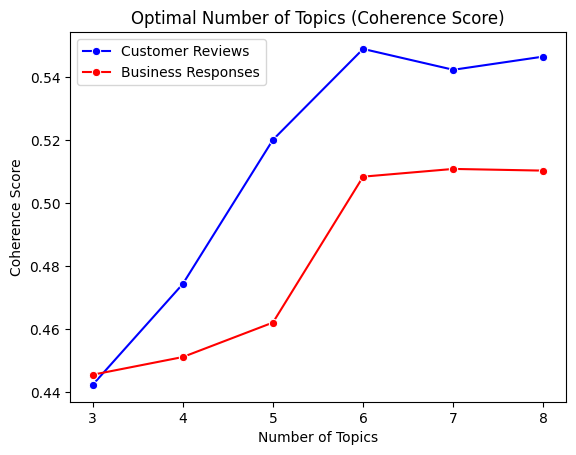

In [ ]:
import seaborn as sns

x = range(3, 9)  # Adjust based on new start & limit
sns.lineplot(x=x, y=coherence_values_reviews, label="Customer Reviews", marker='o', color='blue')
sns.lineplot(x=x, y=coherence_values_responses, label="Business Responses", marker='o', color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics (Coherence Score)")
plt.legend()
plt.show()


Using the elbow method, we should choose the number of topics where the coherence score increases significantly and then starts to plateau. From this graph, we could safely pick 6 topics for both Customer Reviews and Business Responses.

Trying out Gensim LDA model because it has Built-in coherence score support:

In [ ]:
lda_reviews = gensim.models.LdaModel(
    corpus=corpus_reviews,
    id2word=id2word_reviews,
    num_topics=6,
    passes=10,
    random_state=42
)

lda_responses = gensim.models.LdaModel(
    corpus=corpus_responses,
    id2word=id2word_responses,
    num_topics=6,
    passes=10,
    random_state=42
)

In [ ]:
def print_clean_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.print_topics(num_words=n_top_words)):
        words = [word.split('*')[-1].replace('"', '').strip() for word in topic[1].split(' + ')]
        print(f"Topic #{topic_idx + 1}: {' '.join(words)}")

In [ ]:
print("\nCustomer Reviews Topics:")
print_clean_topics(lda_reviews, id2word_reviews, n_top_words=10)


Customer Reviews Topics:
Topic #1: great food good service place nice excellent staff friendly always
Topic #2: car service great experience new work us would made recommend
Topic #3: time go get even back one like dont never cant
Topic #4: original google store translated good shop beautiful place love nice
Topic #5: best pizza ever delicious chicken one ive love favorite amazing
Topic #6: staff great friendly always recommend helpful highly amazing love best


In [ ]:
print("\nBusiness Responses Topics:")
print_clean_topics(lda_responses, id2word_responses, n_top_words=10)


Business Responses Topics:
Topic #1: please help anything need new us know let hesitate car
Topic #2: please us like experience would feel sorry love hear thank
Topic #3: thank review thanks us much appreciate star see time great
Topic #4: glad back soon see hope enjoyed thanks happy owner come
Topic #5: thank forward look kind review words much visit appreciate seeing
Topic #6: experience us service great hear best customers always glad thank


Scikit-learn LDA:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')

text_vectorized = vectorizer.fit_transform(df_sampled_clean_text['text'])

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6, max_iter=10, random_state=42)
lda.fit(text_vectorized)

LatentDirichletAllocation(n_components=6, random_state=42)

In [18]:
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

print_top_words(lda, vectorizer.get_feature_names_out())

Topic #1: food good best pizza place delicious chicken like restaurant just
Topic #2: car experience time recommend work new did professional thank best
Topic #3: great food service good staff friendly place nice excellent awesome
Topic #4: original google translated good muy la excellent que place el
Topic #5: place great store good nice love like parking shop fun
Topic #6: service order time just customer don minutes said told people


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_resp = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')

text_vectorized_resp = vectorizer_resp.fit_transform(df_sampled_clean_resp['clean_resp_text'])

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
lda_resp = LatentDirichletAllocation(n_components=6, max_iter=10, random_state=7)
lda_resp.fit(text_vectorized_resp)

LatentDirichletAllocation(n_components=6, random_state=7)

In [21]:
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

print_top_words(lda_resp, vectorizer_resp.get_feature_names_out())

Topic #1: thanks kind words great experience best glad service hope make
Topic #2: experience com like sorry contact thank feedback email hear visit
Topic #3: thank review thanks appreciate star hope rating time soon taking
Topic #4: thank forward look review soon visit enjoyed glad seeing happy
Topic #5: sorry know time thank make hear experience service new customer
Topic #6: thank experience happy know hear time taking team review let


**What we found:**

For customer reviews, we expect to uncover topics related to quality, experiences, pricing, or potential issues, allowing us to assess what drives positive or negative sentiment. For business responses, we anticipate topics centered on courtesy phrases like "Thank you for your feedback" or "We're sorry for your experience." Therefore, those 6 topics from both user reviews and business response above reflect exactly our anticipated results. However, the LDA topics look somewhat similar, with overlapping themes like food, service, staff friendliness, and customer experiences. This suggests that some topics may be redundant or too closely related, making it harder to extract distinct insights. As a result, I decide to go further with merging the topic using cosine similarity on the topics. This helps us summarize the major categories of customer reviews and response.

**Let's determine the similar topics and merge them using Cosine similarity**

In [22]:
review_topic_vectors = lda.transform(text_vectorized)

response_topic_vectors = lda_resp.transform(text_vectorized_resp)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

topic_word_matrix_reviews = lda.components_
topic_word_matrix_responses = lda_resp.components_

df_topics_reviews = pd.DataFrame(topic_word_matrix_reviews, columns=vectorizer.get_feature_names_out())
df_topics_responses = pd.DataFrame(topic_word_matrix_responses, columns=vectorizer_resp.get_feature_names_out())

In [52]:
cosine_sim_reviews = cosine_similarity(df_topics_reviews)

cosine_sim_responses = cosine_similarity(df_topics_responses)

df_cosine_reviews = pd.DataFrame(cosine_sim_reviews, columns=[f"Topic {i+1}" for i in range(len(cosine_sim_reviews))],
                                 index=[f"Topic {i+1}" for i in range(len(cosine_sim_reviews))])

df_cosine_responses = pd.DataFrame(cosine_sim_responses, columns=[f"Topic {i+1}" for i in range(len(cosine_sim_responses))],
                                   index=[f"Topic {i+1}" for i in range(len(cosine_sim_responses))])

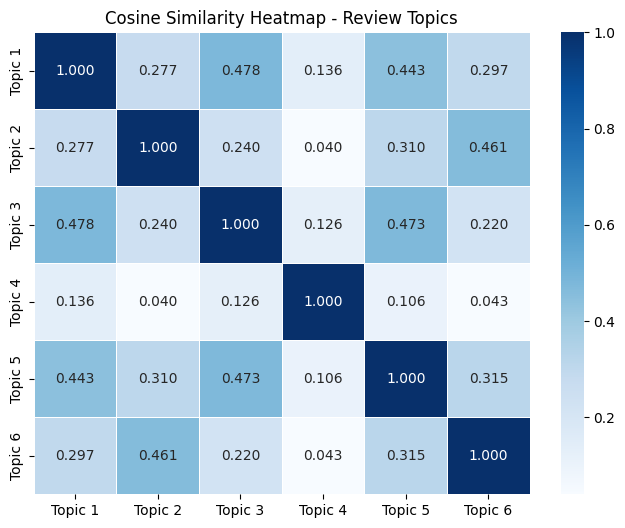

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_cosine_reviews, annot=True,cmap="Blues", fmt=".3f", linewidths=0.5)
plt.title("Cosine Similarity Heatmap - Review Topics")
plt.show()

By looking at this matrix, I will pick the threshold at 0.4 for review topics.

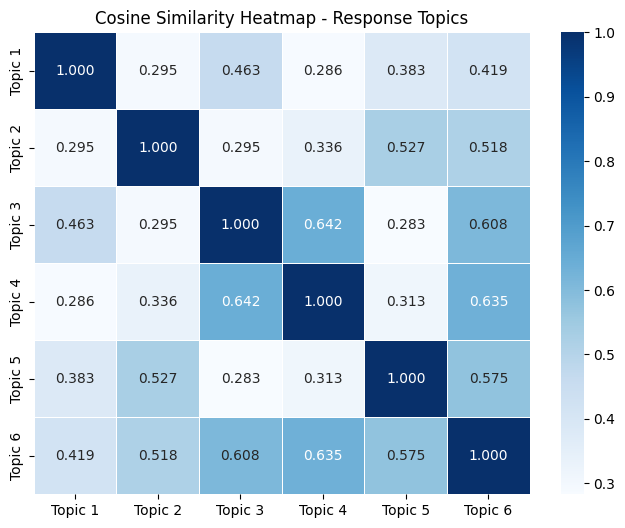

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cosine_responses, annot=True, cmap="Blues", fmt=".3f", linewidths=0.5)
plt.title("Cosine Similarity Heatmap - Response Topics")
plt.show()

And pick 0.5 for response topics.



In [68]:
similar_topics_reviews = np.where(cosine_sim_reviews > 0.4)
similar_topics_reviews = [(i, j) for i, j in zip(similar_topics_reviews[0], similar_topics_reviews[1]) if i != j]

similar_topics_responses = np.where(cosine_sim_responses > 0.5)
similar_topics_responses = [(i, j) for i, j in zip(similar_topics_responses[0], similar_topics_responses[1]) if i != j]

print(f"Highly similar review topics: {similar_topics_reviews}")
print(f"Highly similar response topics: {similar_topics_responses}")

Highly similar review topics: [(0, 2), (0, 4), (1, 5), (2, 0), (2, 4), (4, 0), (4, 2), (5, 1)]
Highly similar response topics: [(1, 4), (1, 5), (2, 3), (2, 5), (3, 2), (3, 5), (4, 1), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4)]


From this result, we can see
- For review topics: topic 1, 3, 5 are similar and topic 2,6 are similar. Topic 4 does not have high cosine similarity with any other topics. Base on my intuition, will give create 3 major categories from these topics. Category A include topic [1,3,5], B include topic [2,6], and category C is topic 4.

- For response topics: topic 1,3,4,6 are similar and topic 2,5 are similar. So 2 category X and Y.


**Conclusion:**

Here’s how the categories could be framed as topic sentences to better summarize the themes:

For user reviews:

- Category A (Service & Experience Quality): "Thank you for the excellent service and great experience!"
  
  Customers appreciate good food, friendly staff, and positive overall experiences.

- Category B (Operational Issues): "The service could be faster and more efficient."

  Customers express concerns about delays, order processing, and logistical inefficiencies.

- Category C (Translation Challenges)

  User reviews are not in English. These comments could be in Spanish or any other languages and the model which I ran only detect "english" language.

For business responses:

- Category X (Customer Appreciation & Engagement): "We appreciate your feedback and look forward to your next visit!"
  
  Businesses commonly use gratitude-driven responses to engage with customers positively.

- Category Y (Issue Resolution & Apologies): "We’re sorry for the inconvenience—please contact us to resolve the issue."

  Businesses respond to complaints by offering apologies and potential solutions.




